In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:/PARTH SHAH/R/ALY 6020/Module 1 Project/adult-all.csv")

In [4]:
df.columns = ['age','workclass','fnlwgt','education','educationnum',
'maritalstatus','occupation','relationship','race','sex',
'capitalgain','capitalloss','hoursperweek','nativecountry','salary']

In [5]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


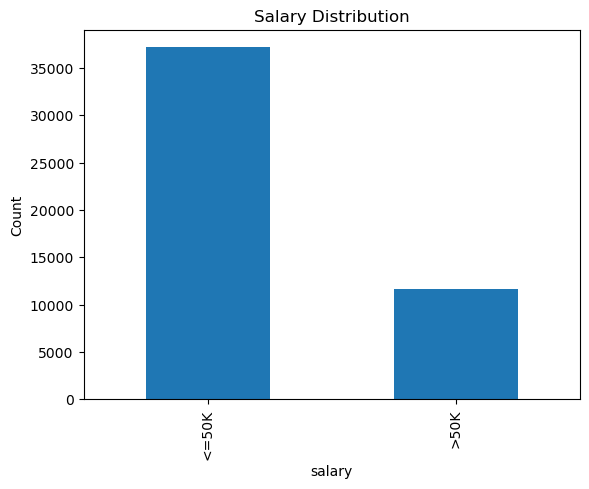

In [35]:
df.salary.value_counts().plot(kind='bar')
plt.xlabel('salary')
plt.ylabel('Count')
plt.title('Salary Distribution')
plt.show()

In [6]:
def assign(x):
    check = ['Greece','Vietnam', 'China','Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada','South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran','England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba','Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic','Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala','Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland','Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)','others']
    if x in check:
        return "others"
    else:
        return x

df["nativecountry"] = pd.DataFrame(map(assign,df["nativecountry"]))

In [7]:
def assign(x):
    check = ['10th','7th-8th','Prof-school','9th','12th','Doctorate','5th-6th','1st-4th','Preschool']
    if x in check:
        return "others"
    else:
        return x

df["education"] = pd.DataFrame(map(assign,df["education"]))

In [8]:
def assign(x):
    check = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
    if x in check:
        return "others"
    else:
        return x

df["workclass"] = pd.DataFrame(map(assign,df["workclass"]))

In [9]:
def assign(x):
    check = ['others','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']
    if x in check:
        return "others"
    else:
        return x

df["occupation"] = pd.DataFrame(map(assign,df["occupation"]))

In [10]:
df["workclass"] = df["workclass"].replace("?","others")
df["occupation"] = df["occupation"].replace("?","others")
df["nativecountry"] = df["nativecountry"].replace("?","others")

In [11]:
def binary(x):
    if x == "Male":
        return 1
    else:
        return 0

    
df["sex"] = df["sex"].apply(binary)

In [12]:
wc = pd.get_dummies(df[["workclass"]],drop_first = True)
df = pd.concat([df,wc],axis=1)
### 'education' 
edu = pd.get_dummies(df[["education"]],drop_first = True)
df = pd.concat([df,edu],axis=1)
### 'marital.status'
ms = pd.get_dummies(df[["maritalstatus"]],drop_first = True)
df = pd.concat([df,ms],axis=1)
### 'occupation'
occu =pd.get_dummies(df[["occupation"]],drop_first = True)
df = pd.concat([df,occu],axis=1) 
### 'relationship'
rel =pd.get_dummies(df[["relationship"]],drop_first = True)
df = pd.concat([df,rel],axis=1)
### 'race'
race = pd.get_dummies(df[["race"]],drop_first = True)
df = pd.concat([df,race],axis=1) 
### 'native.country'
nc = pd.get_dummies(df[["nativecountry"]],drop_first = True) 
df = pd.concat([df,nc],axis=1)

In [13]:
df.drop(['workclass','education','maritalstatus','occupation','relationship','race','nativecountry'],axis=1,inplace=True)

In [14]:
X = df.drop(["salary",'capitalloss','capitalgain'],axis=1)
X.head()

,age,fnlwgt,educationnum,sex,hoursperweek,workclass_Private,workclass_Self-emp-not-inc,workclass_others,education_Assoc-acdm,education_Assoc-voc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,nativecountry_United-States,nativecountry_others
0,50,83311,13,1,13,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,38,215646,9,1,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,53,234721,7,1,40,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,40,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,37,284582,14,0,40,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [15]:
Y = df["salary"]
Y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: salary, dtype: object

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
accuracies = []

for k in range(1, 120):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    ACC = accuracy_score(Y_test, Y_pred)
    accuracies.append(ACC)

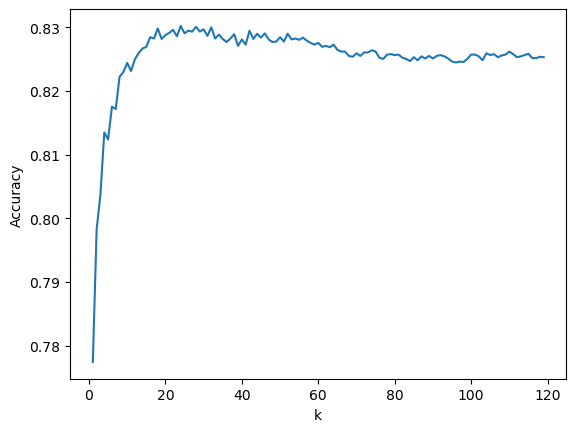

In [27]:
plt.plot(range(1,120), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [28]:
model = KNeighborsClassifier(n_neighbors=50, p=2, metric='euclidean')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [29]:
# Accuracy
from sklearn.metrics import accuracy_score
ACC = accuracy_score(Y_test,Y_pred)
ACC

0.8284310380126937

In [30]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test.values,Y_pred)
matrix

array([[10201,   925],
       [ 1589,  1938]], dtype=int64)

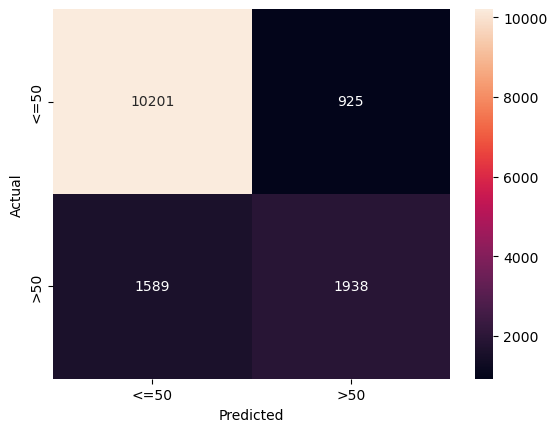

In [32]:
#Confusion Matrix 
conf_matrix = confusion_matrix(Y_test, Y_pred) 
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['<=50', '>50'], yticklabels=['<=50', '>50']) 
plt.ylabel('Actual') 
plt.xlabel('Predicted') 
plt.show()